In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Exercises

## Question 1:

Let $y = e^{-x/10}\sin(x)$. Consider 10000 $x$ intervals in the range $[0, 10]$

1. Plot the function $y$ vs $x$ in the range $[0,10]$
2. Compute the mean and standard deviation of y for x values in $[4,7]$
3. For $x$ in the range $[4,7]$ find the value $y_m$ such that 80% of the $y$ values are less than $y_m$
4. Plot $dy/dx$ vs $x$
5. Find the locations where $dy/dx = 0$

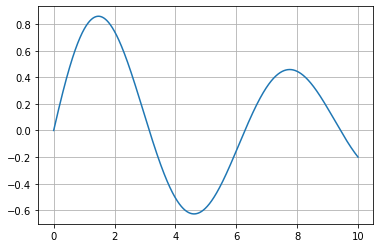

In [10]:
# 1
x = np.linspace(0,10,10001)
y = np.exp(-x/10)*np.sin(x)

plot(x,y)
grid()

In [7]:
#2 
sel = (x<=7) & (x>=4)
print("Mean of y(4<x<7):{}".format(np.mean(y[sel])))
print("Std of y(4<x<7):{}".format(np.std(y[sel])))

Mean of y(4<x<7):-0.2956023068963138
Std of y(4<x<7):0.31448753875085117


In [8]:
#3
np.percentile(y[sel],80)

0.06145551274590662

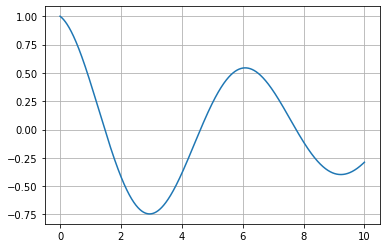

In [11]:
#4
dydx = np.gradient(y,x)
plt.plot(x,dydx)
grid()

In [17]:
#5
# we can do dy/dx(x_i)*dy/dx(x_i+1). If it's negative then we have crossed the line y=0. we find this points.
cross0 = dydx[1:]*dydx[:-1]<0
print("The zeros of dy/dx are in :",x[1:][dydx[1:]*dydx[:-1]<0])

The zeros of dy/dx are in : [1.472 4.613 7.755]


## Question 2

Sum together every number from 0 to 10000 except for those that are divided by 4 or 7.

In [21]:
nums = np.arange(0,10001)
np.sum(nums[(nums%4!=0)&(nums%7!=0)])

32147142

## Question 4

Consider the flower petal 
$$
r(\theta) = 1 + \frac{3}{4}\sin(3\theta) \text{ for } 0\leq\theta\leq2\pi
$$

1. Make a plot of the flower petal
2. Compute the area using the calculus formula  $A=\int^{2\pi}_{0} \frac{1}{2} r^2 d\theta $
3. Compute the arclength using the calculus formula $L=\int^{2\pi}_{0} \sqrt{r^2 + (\frac{dr}{d\theta})^2}d\theta$

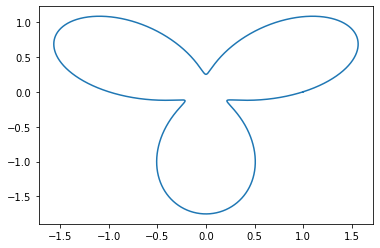

In [22]:
#1
th = np.linspace(0,2*np.pi,10000)
r = 1 + 3 * np.sin(3*th)/4

x = r*np.cos(th)
y = r*np.sin(th)

plt.plot(x,y)

In [29]:
#2
A = 0.5*np.sum(r**2)*np.diff(th)[0]
A

4.02547977809635

In [30]:
#3
drdth = np.gradient(r,th)

L = np.sum(np.sqrt(r**2 + drdth**2))*np.diff(th)[0]
L

11.626531213518827

## Question 4

The power emitted by a blackbody is $P = A \sigma \epsilon T^4$ . After measuring the temperature of a star, you  find that $T(t) = T_0 \frac{1}{1+e^{-kt}}$.

Plot the total energy emitted by the star as a function of time using the fact that $E(t) = \int^{t}_0 P(t')dt'$

We will deal with unitless quantities, so  $P' = \frac{P}{A\sigma\epsilon T_0^4} = (\frac{1}{1+e^{-kt}})^4$ 

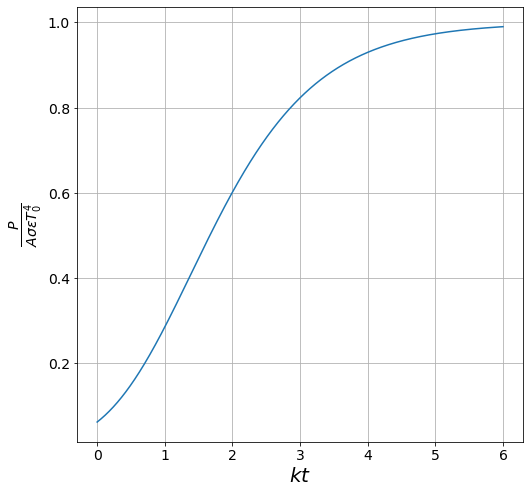

In [45]:
rcParams['figure.figsize']=8,8
rcParams['font.size']=14
kt = np.linspace(0,6,10000)

Pp = 1/(1+np.exp(-kt))**4

plt.plot(kt,Pp)
plt.ylabel(r"$\frac{P}{A\sigma\epsilon T^4_0}$",fontsize=20)
plt.xlabel('$kt$',fontsize=20)
plt.grid()

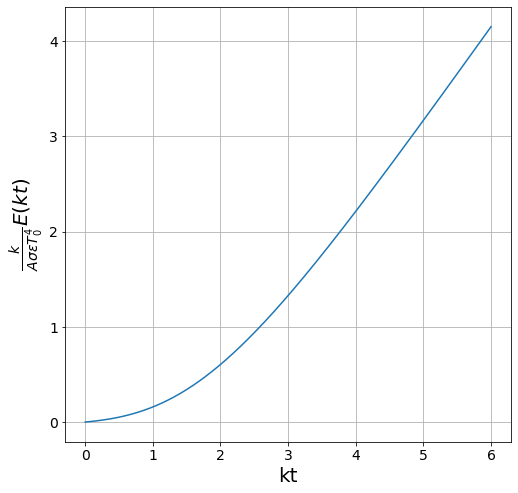

In [47]:
# For the Energy over time we will plot it as a function of kt. We will. also make the y axis unitless

E = np.cumsum(Pp)*np.diff(kt)[0]

plt.plot(kt,E)
plt.ylabel(r'$\frac{k}{A\sigma\epsilon T^4_0}E(kt)$',fontsize=20)
plt.xlabel(r'kt',fontsize=20)
plt.grid()